# Lab 4

## import libs and connect to database

In [32]:
import pandas
import configparser 
import psycopg2

In [33]:
config=configparser.ConfigParser()
config.read('config.ini')

host= config['myaws']['host']
db= config['myaws']['db']
user= config['myaws']['user']
pwd= config['myaws']['pwd']

In [34]:
conn = psycopg2.connect(
                        host=host,
                        user=user,
                        password=pwd,
                        dbname=db
                        )

In [35]:
cur=conn.cursor()

## q1

In [7]:
sql_q1="""
        select * from gp24.student
        """

In [8]:
df=pandas.read_sql_query(sql_q1, conn)
df[:]

,s_email,s_name,major
0,s1@dukes.jmu.edu,student1,IA
1,s2@dukes.jmu.edu,student2,IA
2,s3@dukes.jmu.edu,student3,IA
3,s4@dukes.jmu.edu,student4,IA\n
4,s6@jmu.edu,s6,GS
5,s5@jmu.edu,s5,GS
6,s7@jmu.edu,s7,GS


## q2

In [11]:
sql_q2="""
        select gp24.professor.p_name,
        gp24.course.c_name
        from gp24.professor
        inner join gp24.course
        on gp24.professor.p_email = gp24.course.p_email
        """

In [12]:
df=pandas.read_sql_query(sql_q2, conn)
df[:]

,p_name,c_name
0,Timothy Walton,Hypothesis Testing\n
1,Xuebin Wei,Data Mining
2,Kathleen Moore,Tech Apps in a Networked World
3,Noel Hendrickson\n,Counterfactual Reasoning
4,new_p,new_c_name


## q3

In [13]:
sql_q3 = """
        select c_number, 
        count(c_number) as enrolled 
        from gp24.enroll_list
        group by c_number
        order by enrolled desc
        """

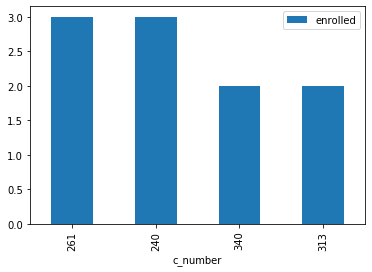

In [15]:
df=pandas.read_sql_query(sql_q3, conn)
df.plot.bar(y='enrolled', x='c_number')

## q4

In [16]:
sql_q4="""
        select gp24.professor.p_name,
        count(gp24.course.c_name) as teaching_number
        from gp24.professor
        inner join gp24.course
        on gp24.professor.p_email = gp24.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

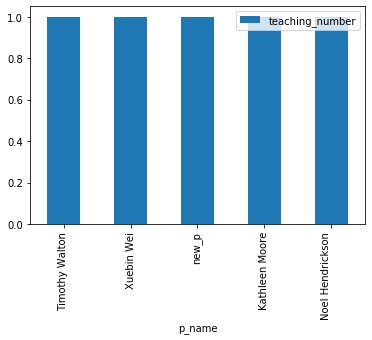

In [18]:
df=pandas.read_sql_query(sql_q4, conn)
df.plot.bar(y='teaching_number', x='p_name' )

## q5

In [24]:
sql_q5_professor= """
                    insert into gp24.professor(p_email, P_name, office)
                    values ('{}','{}','{}')
                    """.format('new_p1@jmu.edu', 'new_p1','new_office1')

In [25]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(new_p1@jmu.edu) already exists.


In [26]:
conn.commit()

In [27]:
df=pandas.read_sql_query('select * from gp24.professor', conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson\n,Null
1,moore8ka@jmu.edu,Kathleen Moore,ISAT 116\n
2,waltontr@jmu.edu,Timothy Walton,ISAT 326
3,weixx@jmu.edu\n,Xuebin Wei,ISAT 112
4,new_p@jmu.edu,new_p,new_office
5,new_p1@jmu.edu,new_p1,new_office1


In [36]:
sql_q5_course= """
                    insert into gp24.course(c_number, c_name, room, p_email)
                    values ('{}','{}','{}', '{}')
                    """.format('ia_new', 'new_c_name','online','new_p@jmu.edu')

In [37]:
cur.execute(sql_q5_course)

IntegrityError: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(ia_new) already exists.


In [39]:
conn.commit()

In [40]:
df=pandas.read_sql_query('select * from gp24.course', conn)
df[:]

,c_number,c_name,room,p_email
0,261,Hypothesis Testing\n,ISAT 148\n,waltontr@jmu.edu
1,340,Data Mining,Online,weixx@jmu.edu\n
2,240,Tech Apps in a Networked World,Online,moore8ka@jmu.edu
3,313,Counterfactual Reasoning,ISAT 148,hendrinx@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu


## q6

In [41]:
sql_q6_course="""
            update gp24.course
            set p_email='{}'
            where p_email='{}'
            """.format('newp@jmu.edu', 'weixx@jmu.edu')

In [42]:
cur.execute(sql_q6_course)

In [43]:
#cur.execute('ROLLBACK')

In [44]:
conn.commit()

In [45]:
df=pandas.read_sql_query('select * from gp24.course', conn)
df[:]

,c_number,c_name,room,p_email
0,261,Hypothesis Testing\n,ISAT 148\n,waltontr@jmu.edu
1,340,Data Mining,Online,weixx@jmu.edu\n
2,240,Tech Apps in a Networked World,Online,moore8ka@jmu.edu
3,313,Counterfactual Reasoning,ISAT 148,hendrinx@jmu.edu
4,ia_new,new_c_name,online,new_p@jmu.edu


In [47]:
sql_q6_professor="""
                delete from gp24.professor
                where p_email ='{}'
                """.format ('weixx@jmu.edu')

In [48]:
cur.execute(sql_q6_professor)

In [49]:
conn.commit()

In [51]:
df=pandas.read_sql_query('select * from gp24.professor', conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson\n,Null
1,moore8ka@jmu.edu,Kathleen Moore,ISAT 116\n
2,waltontr@jmu.edu,Timothy Walton,ISAT 326
3,weixx@jmu.edu\n,Xuebin Wei,ISAT 112
4,new_p@jmu.edu,new_p,new_office
5,new_p1@jmu.edu,new_p1,new_office1


## close connection

In [52]:
cur.close()
conn.close()